# K-Means Clustering Example-1

C:\Users\Leekha\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


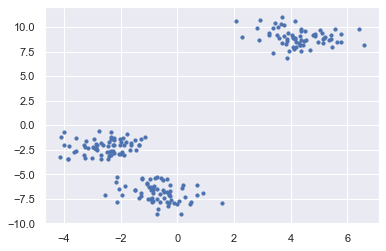

In [1]:
#Importing necessary packages 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.cluster import KMeans

#Generating 2-dimensional dataset having 3 blobs 

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.8)

#Let’s visualize our dataset
plt.scatter(X[:, 0], X[:, 1], s=10);
plt.show()


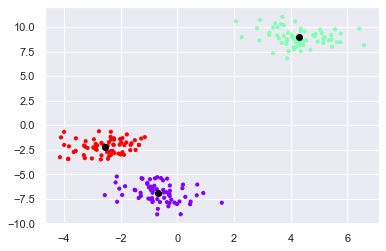

In [2]:
#Creating an object of k-means and providing number of clusters
kmeans = KMeans(n_clusters=3)

#Train the model by using fit method of k-means() class
kmeans.fit(X)

# do the predictions
y_kmeans = kmeans.predict(X)

# Plotting and visualizing cluster’s centers picked by k-means estimators

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black');
plt.show()


# K-Means Clustering Example-2

In [3]:
#Importing necessary packages 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


#Loading sklearn digit dataset. We will also make its object. 
digits = load_digits()
digits.data.shape


(1797, 64)

In [4]:
#Creating an object of k-means.  
kmeans = KMeans(n_clusters=10, random_state=0) 
#Train the model by using fit method of k-means() class
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape


(10, 64)

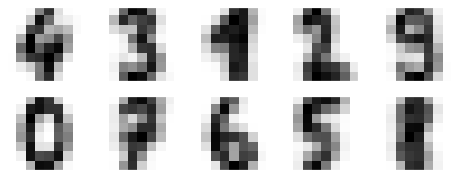

In [5]:
#Picking up cluster centers learned by K-means clustering algorithm.  
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [6]:
#Matching the learned cluster lables with true lables found in them.  
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


In [7]:
#Checking the accuracy.  
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7952142459654981

# Mean-Shift Clustering 

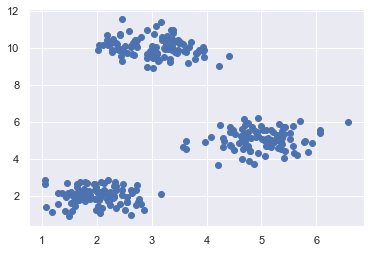

In [8]:
#Importing necessary packages 
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Generating sample dataset
from sklearn.datasets.samples_generator import make_blobs
centers = [[2,2,2],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()


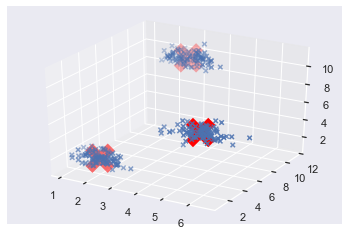

In [9]:
# Train the model using meanshift algorithm 
ms = MeanShift()
ms.fit(X)
# Stroing the cordinates for the cluster centers 
cluster_centers = ms.cluster_centers_

# Plotting the data points and centroids. We will be using Axes3D to plot 3D graph. 
fig = plt.figure()
ms_ax = fig.add_subplot(111, projection='3d')
ms_ax.scatter(X[:,0], X[:,1], X[:,2], marker='x')
ms_ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=500, linewidth=10, zorder=10)
plt.show()


# Hierarchical Cluestering-Understanding the role of dendograms

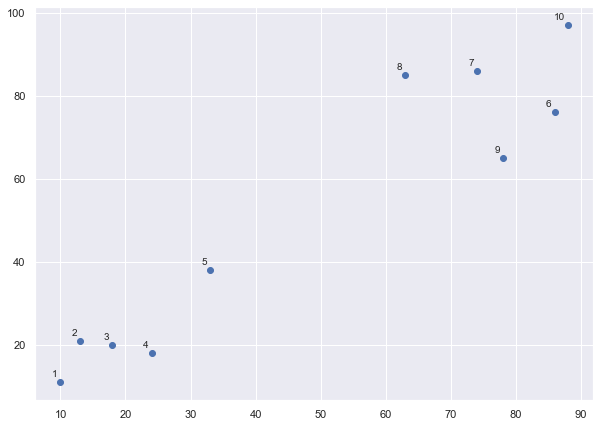

In [10]:
#Importing necessary packages 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Plotting the data points for our example
X = np.array([[10,11],[13,21],[18,20],[24,18],[33,38],[86,76],[74,86],[63,85],[78,65],[88,97],])
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
plt.show()  


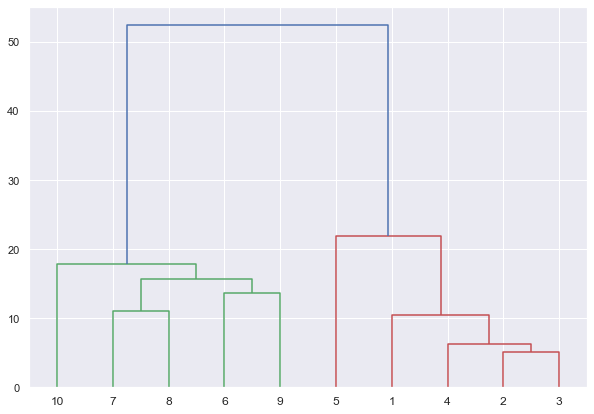

In [11]:
# Plotting the dendograms of our datapoints
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))  
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()  


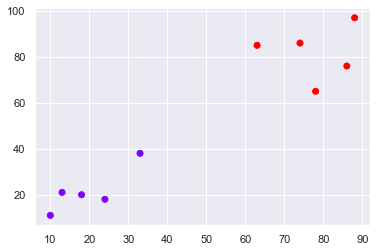

In [12]:
# Predicting the clusters by using AgglomerativeClustering from sklearn.cluster 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  
# Plotting the clusters 
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')



# Hierarchical Cluetring-Implementing using Pima-Indian Dataset

In [13]:
#Importing necessary packages 
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
from pandas import read_csv
#Getting the data points from PIMA INDIAN DIABETES DATASET
path = r"C:\diabetes.csv"
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values 
X = array[:,0:8]
Y = array[:,8]
data.shape


(768, 9)

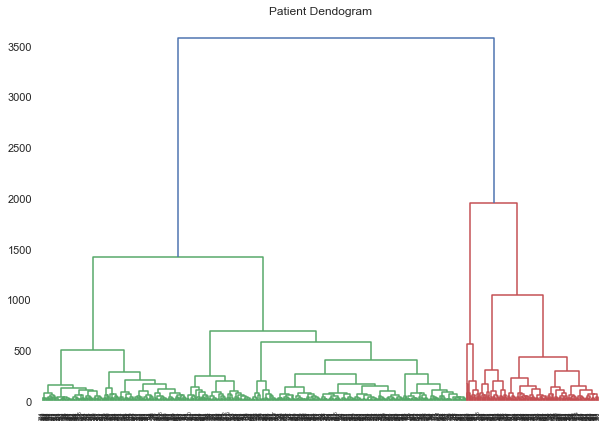

In [14]:
# Plotting the dendograms of our datapoints
diabetes_patient_data = data.iloc[:, 3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Patient Dendogram")  
dend_patient = shc.dendrogram(shc.linkage(data, method='ward'))  


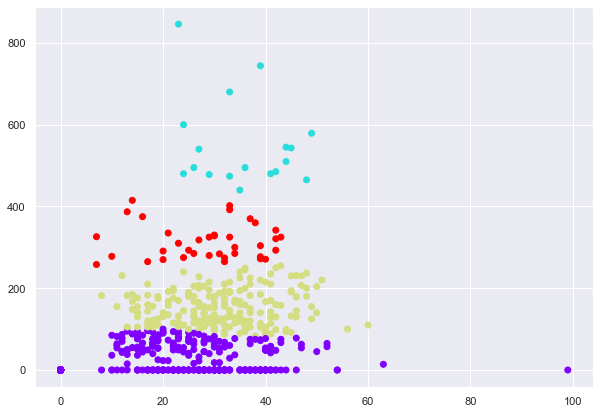

In [15]:
# Predicting the clusters by using AgglomerativeClustering from sklearn.cluster 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(diabetes_patient_data)
# Plotting the clusters 
plt.figure(figsize=(10, 7))  
plt.scatter(diabetes_patient_data [:,0], diabetes_patient_data [:,1], c=cluster.labels_, cmap='rainbow')    
